### Author : Y Manjunatha
### DataScience and Businuess Analytics 
### Task-3 Exploratory Data Analysis - Retail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("E:\Spark\Task-3\SampleSuperstore.csv")

In [3]:
df.shape

(9994, 13)

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### EDA

In [5]:
# Statistical analysis 
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


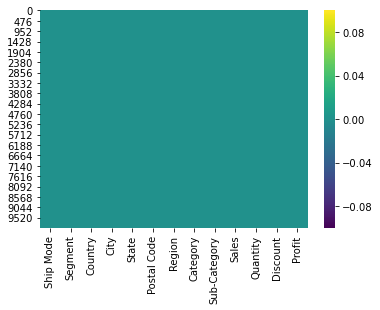

In [7]:
# Null values visualization
sns.heatmap(df.isnull(),cmap='viridis')

In [8]:
# Unique values of the each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

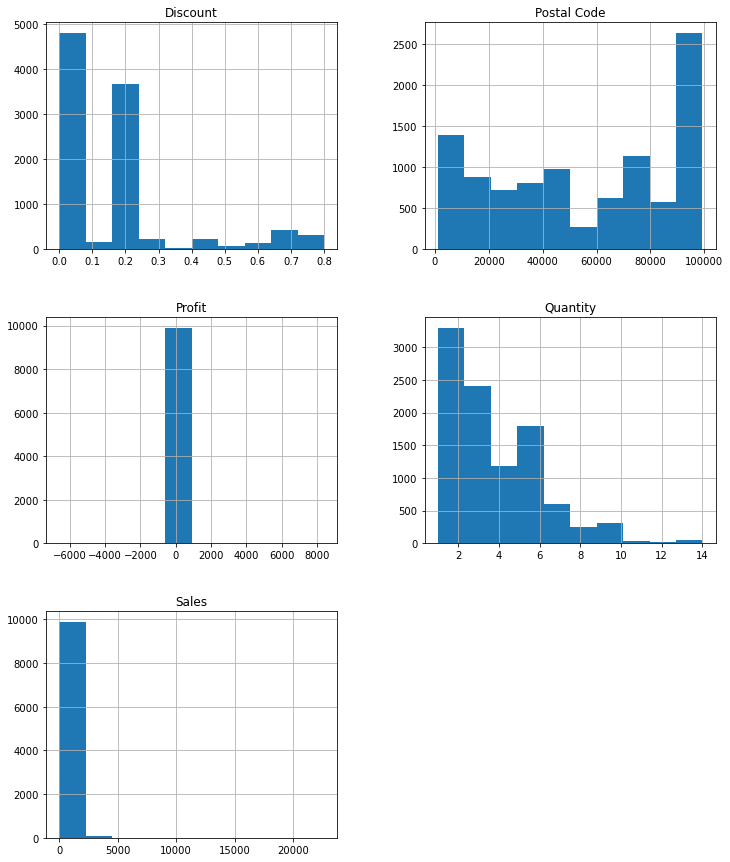

In [9]:
# visualizing each column through histogram
df.hist(figsize=(12,15))
plt.show()

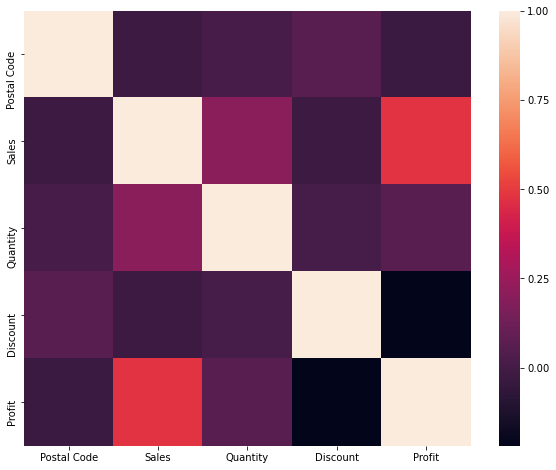

In [10]:
# Cor-relation plot
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr)

We can see from above visualization there's little +ve correlation b/w profit and sales.

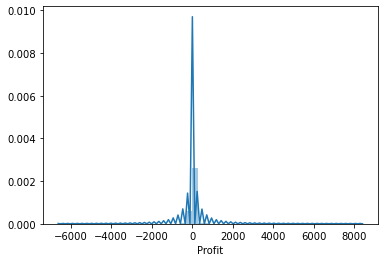

In [11]:
sns.distplot(df['Profit'])

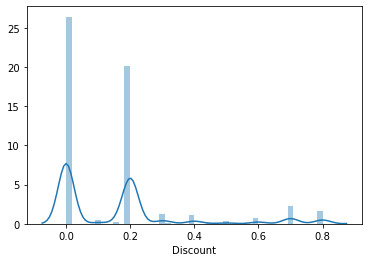

In [12]:
sns.distplot(df['Discount'])

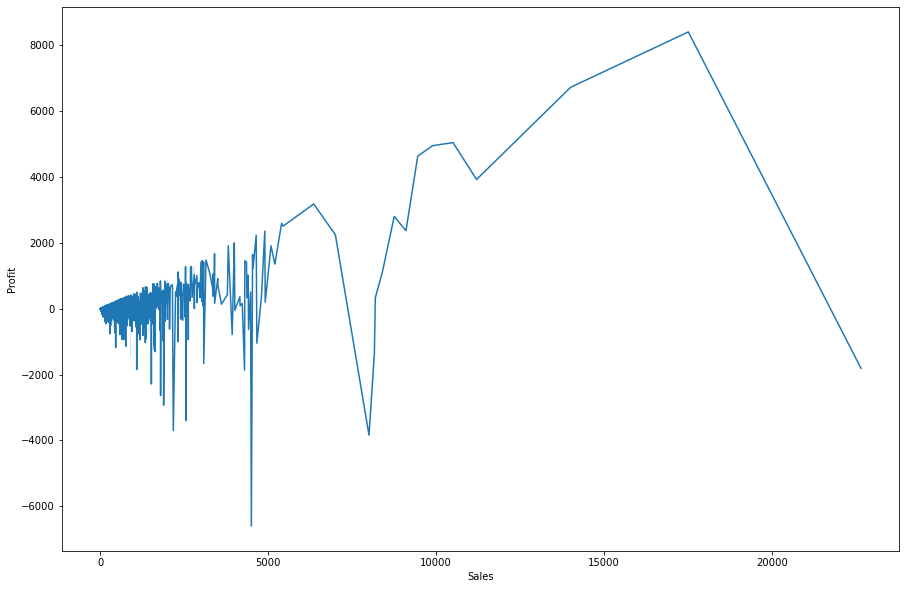

In [13]:
# Sales v/s Profit linegraph
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x = 'Sales', y = 'Profit', data = df)

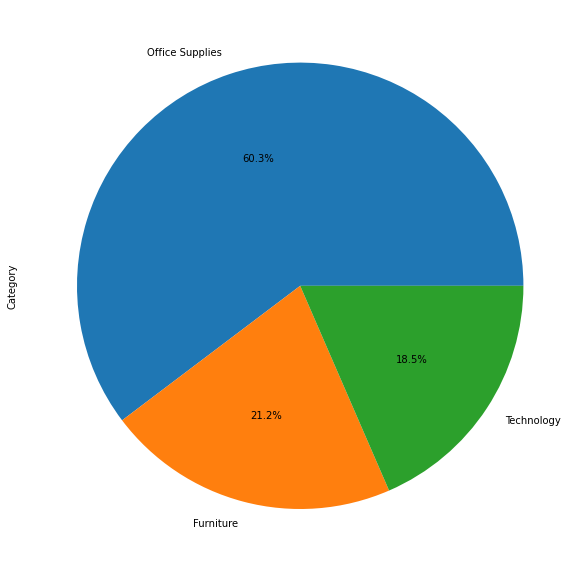

In [14]:
plt.figure(figsize=(10,15))
df['Category'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

we can see from pie graph there are more office supplies are sold

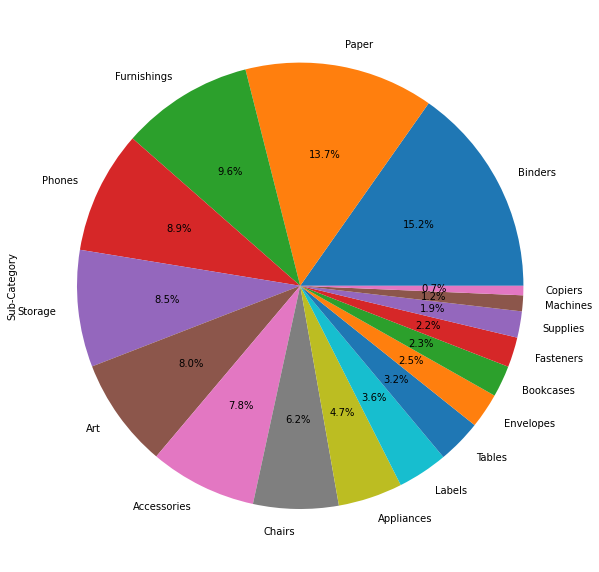

In [15]:
plt.figure(figsize=(10,15))
df['Sub-Category'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

C:\Users\manju\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Sales and Profit')

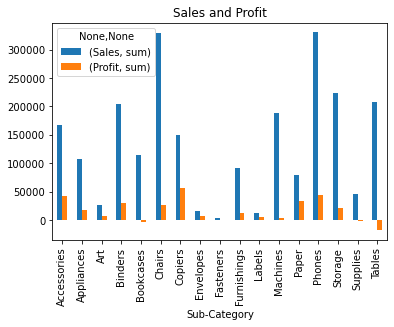

In [16]:
df.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar()
plt.title("Sales and Profit")

There's highest sales in Chairs and Phones and more profit made in Coppiers

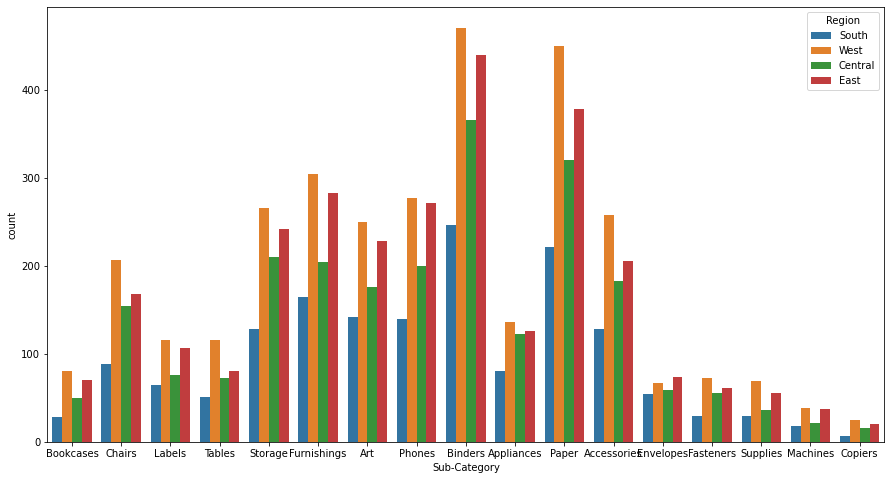

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

From plot we can say west region has highest no of orders

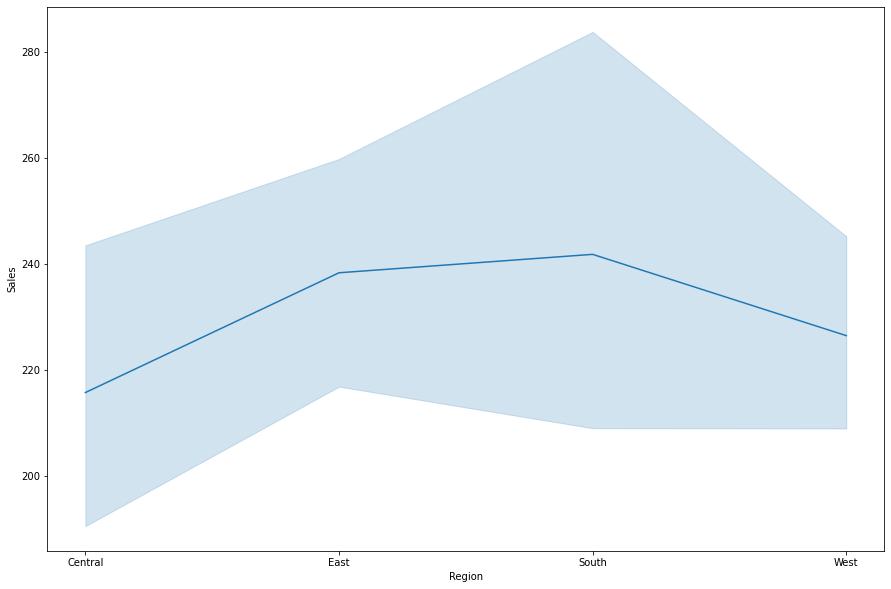

In [18]:
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x = 'Region', y = 'Sales', data = df)

There's more sales in South and West region than other

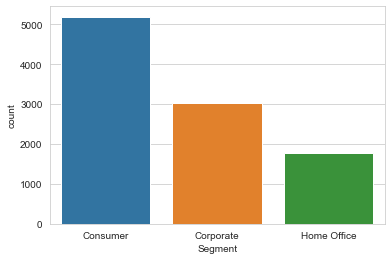

In [19]:
sns.set_style("whitegrid")
sns.countplot(x="Segment",data=df)

In [20]:
df[df.Profit == np.max(df.Profit)] # Maximum profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [21]:
df[df.Sales == np.max(df.Sales)] # Maximum sales

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0.5,-1811.0784


In [22]:
# States with highest revenue
Top_states = df.groupby(['State']).sum().sort_values("Sales",ascending=False).head(20) #top 20 states
Top_states = Top_states[["Sales"]].round(2) # Round off the values to 2 decimal places
Top_states.reset_index(inplace = True) 

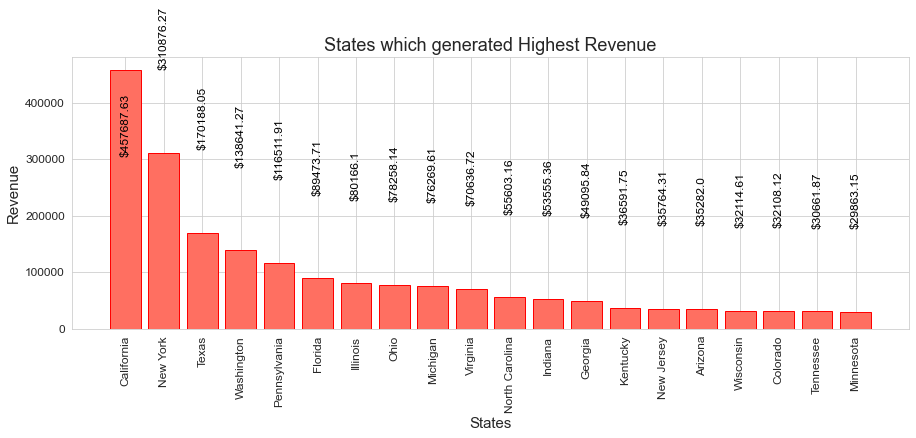

In [23]:
plt.figure(figsize=(15,5))
plt.title("States which generated Highest Revenue",fontsize=18)
plt.bar(Top_states['State'],Top_states['Sales'],color='#FF6F61',edgecolor='Red',linewidth=1)
plt.xlabel("States",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
for k, v in Top_states['Sales'].items():
    if v>400000:
        plt.text(k,v-150000,'$'+str(v),fontsize=12,rotation=90,color='k',horizontalalignment='center');
    else:
        plt.text(k,v+150000,'$'+str(v),fontsize=12,rotation=90,color='k',horizontalalignment='center');

In [24]:
# States with highest revenue
Top_states = df.groupby(['City']).sum().sort_values("Sales",ascending=False).head(20) #top 20 states
Top_states = Top_states[["Sales"]].round(2) # Round off the values to 2 decimal places
Top_states.reset_index(inplace = True) 

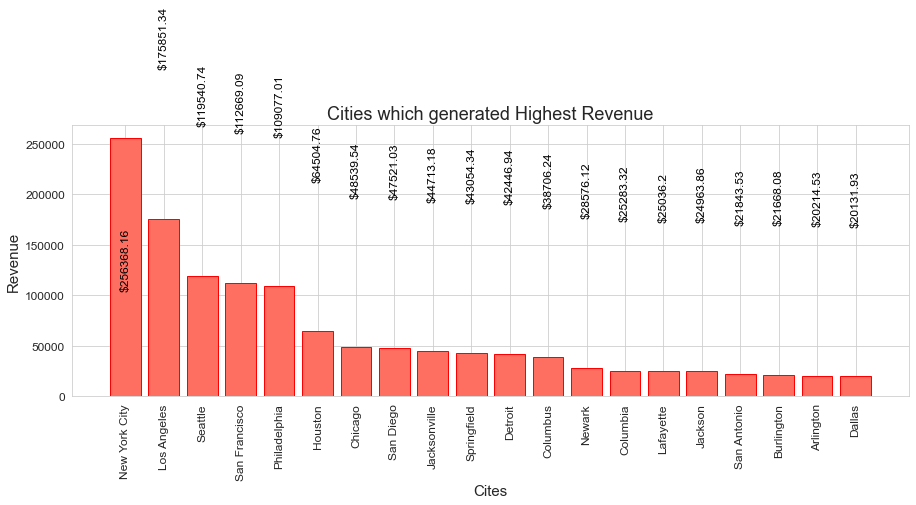

In [25]:
plt.figure(figsize=(15,5))
plt.title("Cities which generated Highest Revenue",fontsize=18)
plt.bar(Top_states['City'],Top_states['Sales'],color='#FF6F61',edgecolor='Red',linewidth=1)
plt.xlabel("Cites",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
for k, v in Top_states['Sales'].items():
    if v>250000:
        plt.text(k,v-150000,'$'+str(v),fontsize=12,rotation=90,color='k',horizontalalignment='center');
    else:
        plt.text(k,v+150000,'$'+str(v),fontsize=12,rotation=90,color='k',horizontalalignment='center');

#### Revenue by each Category

In [26]:
Top_category = df.groupby(["Category"]).sum().sort_values("Sales", ascending=False)  # Sort the Categories as per the sales
Top_category = Top_category[["Sales"]] # keep only the sales column in the dataframe
total_revenue_category = Top_category["Sales"].sum() # To find the total revenue generated as per category
total_revenue_category = str(int(total_revenue_category)) # Convert the total_revenue_category from float to int and then to string
total_revenue_category = '$' + total_revenue_category # Adding '$' sign before the Value
Top_category.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the category into the dataframe

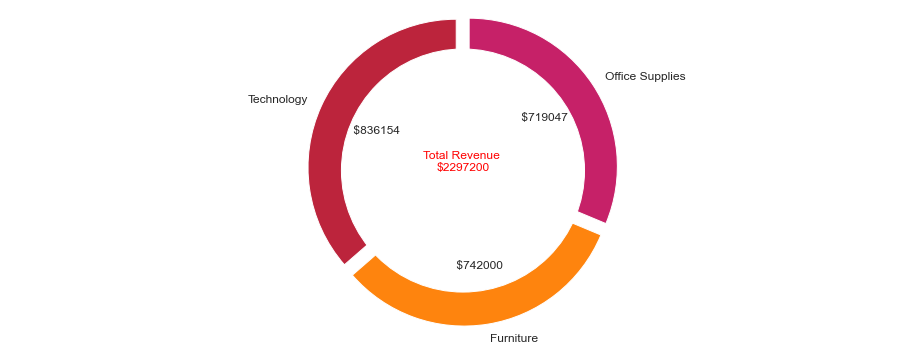

In [27]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

#### Sub-categories contributed more to the revenue

In [28]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") 

In [29]:
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index

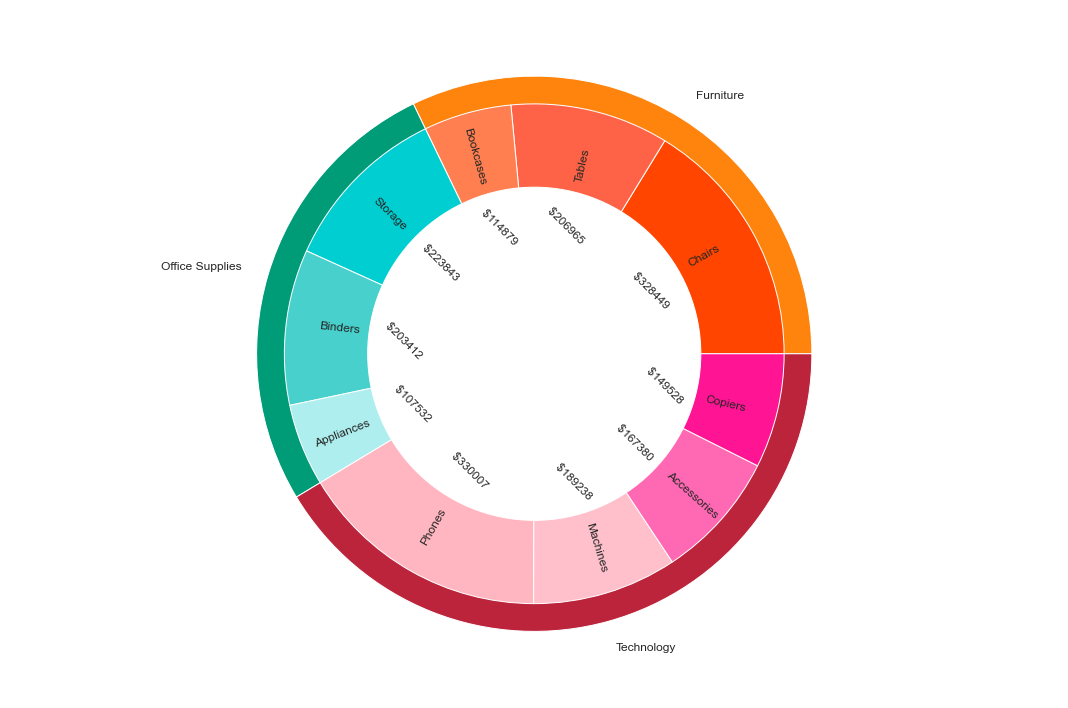

In [30]:
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.1
outer_colors = ['#FE840E','#009B77','#BC243C'] # Outer colors of the pie chart
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"] # inner colors of the pie chart
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values
centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#### Shipping mode with highest sales

In [31]:
Top_shipping = df.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) # Sort the Shipping modes as per the sales
Top_shipping = Top_shipping[["Sales"]] # keep only the sales column in the dataframe
Top_shipping.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Ship Mode column into the data frame
total_revenue_ship = df["Sales"].sum() # To find the total revenue generated as per shipping mode
total_revenue_ship = str(int(total_revenue_ship)) # Convert the total_revenue_ship from float to int and then to string
total_revenue_ship = '$' + total_revenue_ship # Adding '$' sign before the Value

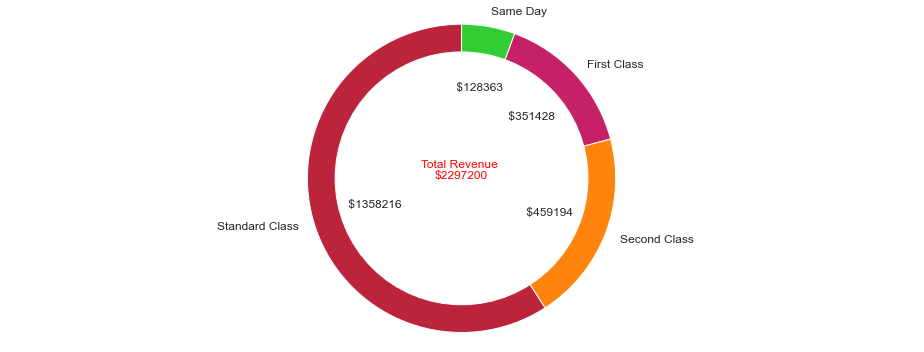

In [32]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
colors = ['#BC243C','#FE840E','#C62168',"limegreen"] # define colors for the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(Top_shipping['Sales'], colors = colors, labels=Top_shipping['Ship Mode'], autopct= autopct_format(Top_shipping['Sales']), startangle=90)
centre_circle = plt.Circle((0,0),0.82,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_ship),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()